In [1]:
# Copyright (c) 2023 Sophie Katz
#
# This file is part of Sophie's ML Monorepo.
#
# Sophie's ML Monorepo is free software: you can redistribute it and/or modify it under
# the terms of the GNU General Public License as published by the Free Software
# Foundation, either version 3 of the License, or (at your option) any later version.
#
# Sophie's ML Monorepo is distributed in the hope that it will be useful, but WITHOUT
# ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A
# PARTICULAR PURPOSE. See the GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License along with Sophie's
# ML Monorepo. If not, see <https://www.gnu.org/licenses/>.

# Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math)

Tutorial URL: https://www.youtube.com/watch?v=w8yWXqWQYmU, https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook

Valid as of: 2023.05.28

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ml.core.repo_paths
import ml.core.download

np.set_printoptions(threshold=30, edgeitems=30)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [11]:
# Download data

mnist_url = "https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv"

path_artifact_data_raw_dir = ml.core.repo_paths.get_dir_artifacts_data_raw("neural_network_from_scatch", create=True)
path_train_csv = path_artifact_data_raw_dir / "train.csv"

ml.core.download.download_http(mnist_url, path_train_csv)

# Load data
data_pd = pd.read_csv(path_train_csv)

data_pd

76.8MB [00:00, 117MB/s]


  Download complete.


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = np.array(data_pd)

np.random.shuffle(data)

dev = data[0:1000]
y_dev = dev[:, 0]
X_dev = dev[:, 1:]
X_dev = X_dev / 255.0

train = data[1000:]
y_train = train[:, 0]
X_train = train[:, 1:]
X_train = X_train / 255.0

In [28]:
print(f"Shape of original data: {data.shape}")
print(f"Shape of dev data split: {dev.shape}")
print(f"Shape of X_dev: {X_dev.shape}")
print(f"Shape of y_dev: {y_dev.shape}")
print(f"Range of y_dev: {np.min(y_dev)} - {np.max(y_dev)} (inclusive)")
print(f"Range of X_dev: {np.min(X_dev)} - {np.max(X_dev)} (inclusive)")
print(f"Range of x_dev[0]: {np.min(X_dev[0])} - {np.max(X_dev[0])} (inclusive)")
print(f"Shape of train data split: {train.shape}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Range of y_train: {np.min(y_train)} - {np.max(y_train)} (inclusive)")
print(f"Range of X_train: {np.min(X_train)} - {np.max(X_train)} (inclusive)")
print(f"Range of x_train[0]: {np.min(X_train[0])} - {np.max(X_train[0])} (inclusive)")

Shape of original data: (42000, 785)
Shape of dev data split: (1000, 785)
Shape of X_dev: (1000, 784)
Shape of y_dev: (1000,)
Range of y_dev: 0 - 9 (inclusive)
Range of X_dev: 0.0 - 1.0 (inclusive)
Range of x_dev[0]: 0.0 - 1.0 (inclusive)
Shape of train data split: (41000, 785)
Shape of X_train: (41000, 784)
Shape of y_train: (41000,)
Range of y_train: 0 - 9 (inclusive)
Range of X_train: 0.0 - 1.0 (inclusive)
Range of x_train[0]: 0.0 - 1.0 (inclusive)


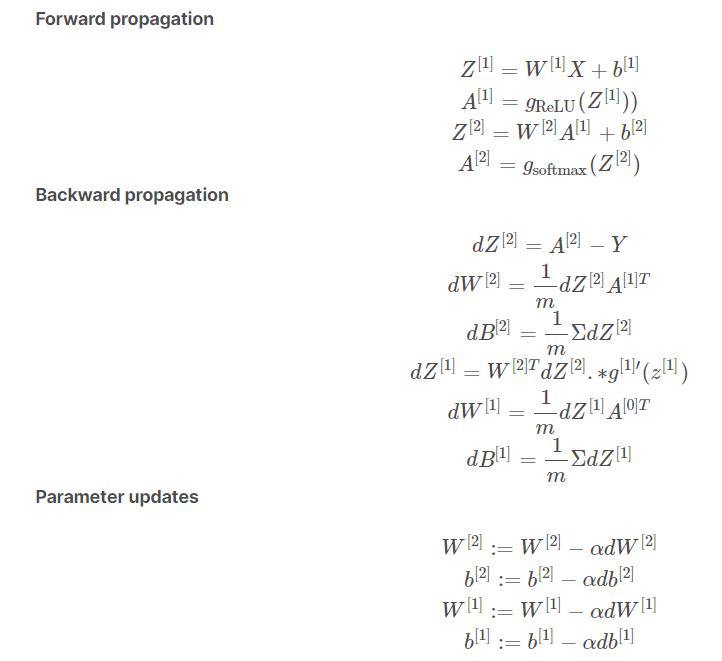

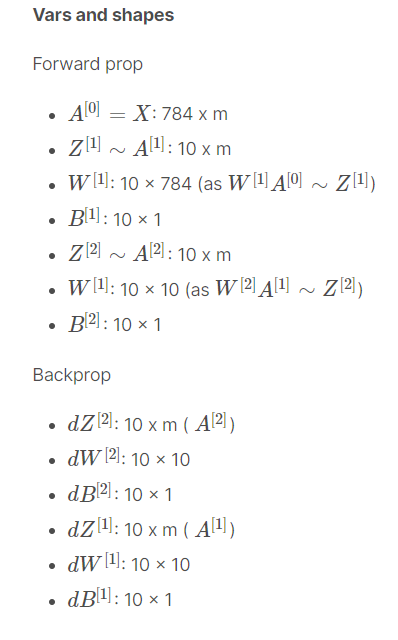

In [36]:
def relu(X):
    return np.maximum(0, X)

assert (relu(np.array([-1, 0, 1])) == np.array([0, 0, 1])).all()

In [44]:
def relu_derivative(X):
    return X > 0

assert (relu_derivative(np.array([-1, 0, 1])) == np.array([0, 0, 1])).all()

In [37]:
def softmax(X):
    return np.exp(X) / sum(np.exp(X))

assert (softmax(np.array([0, 1, 2])) == np.array([0.09003057317038046, 0.24472847105479764, 0.6652409557748219])).all()

In [29]:
class NN(object):
    def __init__(self):
        self.W1 = np.random.rand(10, 768) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5
        self.W2 = np.random.rand(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5
    
    def forward(self, X):
        X = self.W1.dot(X) + self.b1
        X = relu(X)
        X = self.W2.dot(X) + self.b2
        X = softmax(X)
        return X

    